In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.nonparametric.smoothers_lowess as lw
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv("properati1.csv")
df2 = pd.read_csv("properati2.csv")

print("Shape of file number 1: ",df1.shape)
print("Shape of file number 2: ",df2.shape)

print("Data column information of dataframes: ")
print("\n")
df1.info()
df1.head()

Shape of file number 1:  (155437, 27)
Shape of file number 2:  (187482, 27)
Data column information of dataframes: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155437 entries, 0 to 155436
Data columns (total 27 columns):
id                            155437 non-null object
created_on                    155437 non-null object
operation                     155437 non-null object
property_type                 155437 non-null object
place_name                    155422 non-null object
place_with_parent_names       155437 non-null object
country_name                  155437 non-null object
state_name                    155437 non-null object
geonames_id                   130411 non-null float64
lat-lon                       124928 non-null object
lat                           124928 non-null float64
lon                           124928 non-null float64
price                         126705 non-null float64
currency                      126705 non-null object
price_aprox_local_currenc

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,"-34.6767385,-58.6931729",...,93.0,360.36036,1290.322581,NaN,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/9/eiiRS7i9mNVJ4z...
1,b5855f668564f20f90ed1eb958dd34cba9615b00,2012-10-10,sell,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,Argentina,Capital Federal,3427458.0,"-34.5977627867,-58.4373484535",...,40.0,1987.50000,1987.500000,1.0,2.0,300.0,http://www.properati.com.ar/13tz_venta_departa...,"2 AMBIENTES, VENTA, VILLA CRESPO1ER PISO POR E...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/5/acRNGPkpLgWzKG...
2,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,Bs.As. G.B.A. Zona Oeste,3429244.0,"-34.6679135,-58.69881",...,220.0,1000.00000,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/3/4RXmjtz4SiihFX...
3,e06d6f864a0b91346594da4d27ceddcef0947ea6,2012-11-01,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0199509,-57.5265733",...,42.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/336o_venta_departa...,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,DTO. 2 AMB. C/ VISTA PLENA AL MAR,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...
4,a07927207d2a03de5f4ba7fd76f670d6285a3315,2012-11-26,sell,house,Sierra de los Padres,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,Buenos Aires Interior,3427958.0,"-37.9511934894,-57.7752885836",...,265.0,NaN,NaN,NaN,6.0,NaN,http://www.properati.com.ar/47hc_venta_terreno...,PROPIEDAD DE CATEGORIA CUENTA CON: 4 DORMITOR...,CHALET EN VENTA,https://thumbs4.properati.com/9/DA4GMdxXrthh5z...


In [3]:
print("Null values for each dataframe: \n")
print(df1.isnull().sum())
df1["price_per_m2"] = df1["price_per_m2"].fillna(value=0)
df1["lat"] = df1["lat"].fillna(value=0)
df1["lon"] = df1["lon"].fillna(value=0)
print("\n")
print(df2.isnull().sum())

Null values for each dataframe: 

id                                 0
created_on                         0
operation                          0
property_type                      0
place_name                        15
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    25026
lat-lon                        30509
lat                            30509
lon                            30509
price                          28732
currency                       28732
price_aprox_local_currency     28732
price_aprox_usd                28732
surface_total_in_m2            46807
surface_covered_in_m2          26747
price_usd_per_m2               70406
price_per_m2                   47126
floor                         140988
rooms                          61238
expenses                      142050
properati_url                      0
description                        9
title                              0
imag

In [4]:
df1.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.304110e+05,155437.000000,155437.000000,1.267050e+05,1.267050e+05,1.267050e+05,108630.000000,1.286900e+05,8.503100e+04,1.554370e+05,14449.000000,94199.000000,1.338700e+04
mean,3.553748e+06,-27.936031,-47.608722,3.940559e+05,4.143605e+06,2.492844e+05,312.571398,1.568753e+04,1.961147e+03,3.637883e+03,15.966572,3.099492,5.062150e+03
std,3.769420e+05,13.932710,23.621199,8.057945e+05,6.283052e+06,3.779961e+05,2214.440410,5.575164e+06,5.087101e+03,1.819236e+04,123.339966,1.663519,1.249897e+05
min,3.427208e+06,-54.833014,-72.886325,5.000000e+03,8.238893e+04,4.956620e+03,0.000000,0.000000e+00,8.000000e-02,0.000000e+00,1.000000,1.000000,1.000000e+00
25%,NaN,-34.661681,-58.650970,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
50%,NaN,-34.571150,-58.434005,NaN,NaN,NaN,NaN,NaN,NaN,1.529412e+03,NaN,NaN,NaN
75%,NaN,-31.421465,-57.544497,NaN,NaN,NaN,NaN,NaN,NaN,2.488372e+03,NaN,NaN,NaN
max,6.948895e+06,47.396933,19.032799,1.111111e+08,7.736784e+08,4.654544e+07,200000.000000,2.000000e+09,1.271027e+06,2.600000e+06,7071.000000,40.000000,1.000150e+07


In [5]:
df2.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.583180e+05,118761.000000,118761.000000,1.544430e+05,1.544430e+05,1.544430e+05,125027.000000,152420.000000,1.050240e+05,1.316650e+05,14294.000000,80320.000000,1.752000e+04
mean,3.560821e+06,-34.775631,-59.207578,4.402848e+05,4.298946e+06,2.436423e+05,297.023707,146.026630,1.980865e+03,6.125528e+03,14.584301,3.087276,4.872184e+03
std,3.442029e+05,2.071562,2.293300,1.915257e+06,6.870371e+06,3.893775e+05,2072.795972,2617.149603,4.624897e+03,2.567322e+04,103.573137,1.754502,1.105076e+05
min,3.427208e+06,-54.833014,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,6.275958e-02,1.000000,1.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.948895e+06,4.545843,-40.149218,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,987897.000000,1.271027e+06,4.000000e+06,3150.000000,40.000000,1.000150e+07


Median of price_aprox_usd is: 149000.0
Median of price_usd_per_m2 is: 1627.906976744186
Median of price_aprox_usd is: 145000.0
Median of price_usd_per_m2 is: 1675.0


'Done'

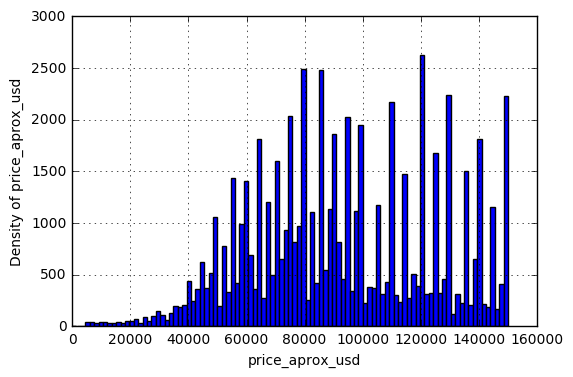

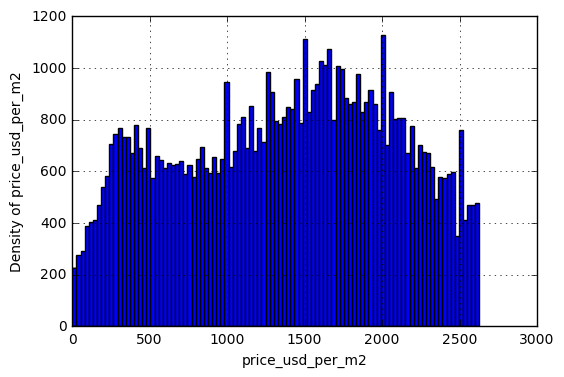

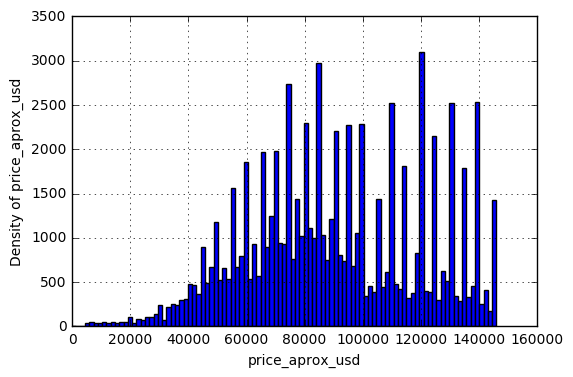

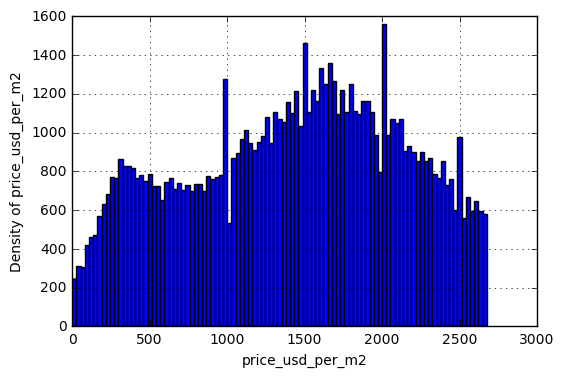

In [6]:
%matplotlib inline

def properati_hist(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        
        print("Median of",col,"is:",df[col].median())
        x = df[col]
        bins = np.linspace(1,df[col].median()+1000, 100)
        x.hist(bins = bins, ax = ax)
    return 'Done'

hist_cols = ["price_aprox_usd", "price_usd_per_m2"]
properati_hist(df1, hist_cols)
properati_hist(df2, hist_cols)

In [7]:
#import math as m
#liste = []
#for lat, lon in zip(df1['lat'], df1['lon']):
#    liste.append(6367*m.acos(\
#    (m.sin(-34.608007)*m.sin(lat))+\
#    (m.cos(-34.608007)*m.cos(lat)*m.cos(-58.369268-lon))\
#    ))
#df1['distance_from_center'] = liste
#df1['distance_from_center'].head() 
import datetime as dt

df1['created_on'] = pd.to_datetime(df1['created_on'], format='%Y-%m-%d')
df1['date'] = df1['created_on'].dt.year

predictors = ['date', 'property_type','place_name', 'state_name' , 'surface_total_in_m2','surface_covered_in_m2', 'price_per_m2', 'floor', 'rooms', 'expenses']  

for col in predictors: # Loop through all columns in predictors
    if df1[col].dtype == 'object':  # check if column's type is object (text)
        df1[col] = pd.Categorical(df1[col]).codes  # convert text to numerical


df1['price'] = df1['price'].fillna(value=df1['price'].median())

for col in predictors: # Loop through all columns in predictors
    df1[col] = df1[col].fillna(value=df1[col].median())
df1.isnull().sum()

id                                0
created_on                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
country_name                      0
state_name                        0
geonames_id                   25026
lat-lon                       30509
lat                               0
lon                               0
price                             0
currency                      28732
price_aprox_local_currency    28732
price_aprox_usd               28732
surface_total_in_m2               0
surface_covered_in_m2             0
price_usd_per_m2              70406
price_per_m2                      0
floor                             0
rooms                             0
expenses                          0
properati_url                     0
description                       9
title                             0
image_thumbnail                2386
date                        

In [8]:

df1.head()


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,date
0,c8a66ee9e3da083ab66dacd165e8a5cc718b1cf2,2012-09-19,sell,2,926,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,1,3429244.0,"-34.6767385,-58.6931729",...,360.36036,1290.322581,3.0,3.0,1800.0,http://www.properati.com.ar/udh_venta_casa_mer...,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,CASA EN VENTA,https://thumbs4.properati.com/9/eiiRS7i9mNVJ4z...,2012
1,b5855f668564f20f90ed1eb958dd34cba9615b00,2012-10-10,sell,1,1111,|Argentina|Capital Federal|Villa Crespo|,Argentina,5,3427458.0,"-34.5977627867,-58.4373484535",...,1987.50000,1987.500000,1.0,2.0,300.0,http://www.properati.com.ar/13tz_venta_departa...,"2 AMBIENTES, VENTA, VILLA CRESPO1ER PISO POR E...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/5/acRNGPkpLgWzKG...,2012
2,a205c53378e7879cf7519659317fb410c060d20e,2012-10-22,sell,2,926,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,Argentina,1,3429244.0,"-34.6679135,-58.69881",...,1000.00000,1000.000000,3.0,3.0,1800.0,http://www.properati.com.ar/20hi_venta_casa_me...,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,CASA EN VENTA,https://thumbs4.properati.com/3/4RXmjtz4SiihFX...,2012
3,e06d6f864a0b91346594da4d27ceddcef0947ea6,2012-11-01,sell,1,694,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,3,3430863.0,"-38.0199509,-57.5265733",...,NaN,0.000000,3.0,2.0,1800.0,http://www.properati.com.ar/336o_venta_departa...,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,DTO. 2 AMB. C/ VISTA PLENA AL MAR,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...,2012
4,a07927207d2a03de5f4ba7fd76f670d6285a3315,2012-11-26,sell,2,1012,|Argentina|Buenos Aires Interior|General Pueyr...,Argentina,4,3427958.0,"-37.9511934894,-57.7752885836",...,NaN,0.000000,3.0,6.0,1800.0,http://www.properati.com.ar/47hc_venta_terreno...,PROPIEDAD DE CATEGORIA CUENTA CON: 4 DORMITOR...,CHALET EN VENTA,https://thumbs4.properati.com/9/DA4GMdxXrthh5z...,2012


In [9]:
#Building the model
y = df1.price
X = df1[predictors]

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=123)
print ('training test : ', X_train.shape)
print ('testing test : ', X_test.shape, y_test.shape)

training test :  (150773, 10)
testing test :  (4664, 10) (4664,)


In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =', train_score)
print  ('test score = ', test_score)

train score = 0.0929902159765
test score =  0.150783203034


In [11]:
print  ('Coeffecients = {}'.format(reg.coef_))
print ('Intecept = {}'.format(reg.intercept_))
print (dict(zip(X.columns,reg.coef_))) #try this if you want print also the columns names

Coeffecients = [  1.56406807e+04   4.92780116e+04  -3.43235682e+00   1.70203457e+04
   2.46923098e+01  -1.03122308e-04   9.64828707e+00   2.97186960e+02
   3.62903607e+04   2.82189746e-02]
Intecept = -31480680.51066665
{'price_per_m2': 9.6482870698435725, 'floor': 297.18695991310358, 'rooms': 36290.360694878487, 'expenses': 0.028218974625832949, 'place_name': -3.4323568154157664, 'surface_total_in_m2': 24.692309839277318, 'date': 15640.680675357899, 'surface_covered_in_m2': -0.0001031223076869666, 'state_name': 17020.345739408414, 'property_type': 49278.011611526337}


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2Each = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-reg.coef_-1)
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))
print('adjusted r2 each: ', adjusted_r2Each)
print('adjusted r2: ', adjusted_r2)

mse = 248008851897.0503, rmse = 498004.87135875516 
mae = 252127.62315848502 r2 = 0.1507832030338927
adjusted r2 each:  [ 1.36072264  1.08875707  0.15140784  1.32044891  0.14626235  0.15078322
  0.14902243  0.09297584  1.12520482  0.15077806]
adjusted r2:  0.148958107833


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X, y = df1[predictors], df1.price
model.fit(X_test, y_test)

# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
X1 = sm.add_constant(X_test)
result = sm.OLS(y_test, X1).fit()

print(result.rsquared, result.rsquared_adj)

0.220215005197 0.218539129429


In [13]:
df1.groupby('property_type').mean()

,place_name,state_name,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,date
property_type,,,,,,,,,,,,,,,,
0,678.368823,3.477028,3.520406e+06,-29.671045,-49.974761,189893.713459,2.397222e+06,144219.830122,135.931605,86.619720,1653.401071,2495.106834,3.034602,3.158315,1782.973267,2016.295568
1,671.721081,5.215883,3.566576e+06,-29.150151,-49.455965,350200.063727,3.282190e+06,197460.564459,102.895893,90.872195,2634.050973,4754.264102,5.046814,2.630834,2210.159486,2016.350339
2,647.188106,3.970289,3.534249e+06,-25.789754,-44.363293,376332.537036,5.588838e+06,336231.386413,463.303158,34190.027960,1020.234382,2227.906363,3.306965,3.652752,1966.710270,2016.215845
3,647.301734,4.823866,3.600990e+06,-29.977409,-50.933182,423856.909443,5.975291e+06,359480.854117,306.701217,218.049428,2245.386394,3763.885005,3.009406,3.013095,1828.537440,2016.130579


In [14]:
predictors = ['date', 'property_type','place_name', 'state_name' , 'surface_total_in_m2','surface_covered_in_m2', 'price_per_m2', 'floor', 'rooms', 'expenses']
print(df1.columns)
#Select the important predictors to fit the model

Index(['id', 'created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'date'],
      dtype='object')


In [15]:
#Convert string data into float/int data
#foreach column used
X = df1.drop(['price','lat','price_aprox_local_currency', 'price_aprox_usd', 'lon','id','created_on','operation','place_with_parent_names','country_name','geonames_id','image_thumbnail','title','description','properati_url','currency','lat-lon'], axis=1, inplace = False)# your code here
#cols_to_transform = [ 'place_name', 'state_name']
#df1 = pd.get_dummies( df1, columns = cols_to_transform )
print(X.columns)

Index(['property_type', 'place_name', 'state_name', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'date'],
      dtype='object')


In [12]:
y = df1.price
#X = df1.drop(['price','id','created_on','operation','image_thumbnail','title','description','properati_url','currency','lat-lon'], axis=1, inplace = False)# your code here
#print (X.columns)
for col in X:
    X[col] = X[col].fillna(value=0)

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (108805, 10) (108805,)
test shape (46632, 10) (46632,)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=123)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

In [ ]:
y_pred = clf.predict(X_test)
from sklearn import metrics
mat_conf=metrics.confusion_matrix(y_test, y_pred)
print (mat_conf)